# Práctica 9: Análisis de asociación

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

In [14]:

peliculas=[["Lilo y Stitch", "Mulan", "Avengers", "Rapidos y Furiosos", "Una esposa de mentira", "Spiderman", 
          "Lluvia de hamburguesas",  "Triple Frontera"],
           [ "Mulan", "Avengers", "Rapidos y Furiosos",  "Spiderman", 
         "Buscando a nemo", "Harry Potter", "Triple Frontera"],
           ["Lilo y Stitch", "Mulan", "Avengers", "Rapidos y Furiosos", "Una esposa de mentira", "Spiderman", 
         "Buscando a nemo", "Lluvia de hamburguesas", "Harry Potter", "Triple Frontera"],
           ["Lilo y Stitch", "Mulan", "Avengers"],
           ["Lilo y Stitch", "Lluvia de hamburguesas", "Harry Potter", "Triple Frontera"],
           ["Lilo y Stitch", "Mulan", "Avengers", "Rapidos y Furiosos","Spiderman", 
         "Buscando a nemo", "Lluvia de hamburguesas", "Harry Potter"],
           ["Harry Potter", "Triple Frontera"],
           ["Lilo y Stitch", "Mulan", "Avengers", "Rapidos y Furiosos"],
           ["Lilo y Stitch", "Mulan", "Avengers", "Una esposa de mentira", 
         "Buscando a nemo", "Harry Potter", "Triple Frontera"]]
peliculas


[['Lilo y Stitch',
  'Mulan',
  'Avengers',
  'Rapidos y Furiosos',
  'Una esposa de mentira',
  'Spiderman',
  'Lluvia de hamburguesas',
  'Triple Frontera'],
 ['Mulan',
  'Avengers',
  'Rapidos y Furiosos',
  'Spiderman',
  'Buscando a nemo',
  'Harry Potter',
  'Triple Frontera'],
 ['Lilo y Stitch',
  'Mulan',
  'Avengers',
  'Rapidos y Furiosos',
  'Una esposa de mentira',
  'Spiderman',
  'Buscando a nemo',
  'Lluvia de hamburguesas',
  'Harry Potter',
  'Triple Frontera'],
 ['Lilo y Stitch', 'Mulan', 'Avengers'],
 ['Lilo y Stitch',
  'Lluvia de hamburguesas',
  'Harry Potter',
  'Triple Frontera'],
 ['Lilo y Stitch',
  'Mulan',
  'Avengers',
  'Rapidos y Furiosos',
  'Spiderman',
  'Buscando a nemo',
  'Lluvia de hamburguesas',
  'Harry Potter'],
 ['Harry Potter', 'Triple Frontera'],
 ['Lilo y Stitch', 'Mulan', 'Avengers', 'Rapidos y Furiosos'],
 ['Lilo y Stitch',
  'Mulan',
  'Avengers',
  'Una esposa de mentira',
  'Buscando a nemo',
  'Harry Potter',
  'Triple Frontera']]

In [15]:
peliculas[0]

['Lilo y Stitch',
 'Mulan',
 'Avengers',
 'Rapidos y Furiosos',
 'Una esposa de mentira',
 'Spiderman',
 'Lluvia de hamburguesas',
 'Triple Frontera']

In [16]:
df = pd.DataFrame.from_records(peliculas)
df

,0,1,2,3,4,5,6,7,8,9
0,Lilo y Stitch,Mulan,Avengers,Rapidos y Furiosos,Una esposa de mentira,Spiderman,Lluvia de hamburguesas,Triple Frontera,None,None
1,Mulan,Avengers,Rapidos y Furiosos,Spiderman,Buscando a nemo,Harry Potter,Triple Frontera,None,None,None
2,Lilo y Stitch,Mulan,Avengers,Rapidos y Furiosos,Una esposa de mentira,Spiderman,Buscando a nemo,Lluvia de hamburguesas,Harry Potter,Triple Frontera
3,Lilo y Stitch,Mulan,Avengers,None,None,None,None,None,None,None
4,Lilo y Stitch,Lluvia de hamburguesas,Harry Potter,Triple Frontera,None,None,None,None,None,None
5,Lilo y Stitch,Mulan,Avengers,Rapidos y Furiosos,Spiderman,Buscando a nemo,Lluvia de hamburguesas,Harry Potter,None,None
6,Harry Potter,Triple Frontera,None,None,None,None,None,None,None,None
7,Lilo y Stitch,Mulan,Avengers,Rapidos y Furiosos,None,None,None,None,None,None
8,Lilo y Stitch,Mulan,Avengers,Una esposa de mentira,Buscando a nemo,Harry Potter,Triple Frontera,None,None,None


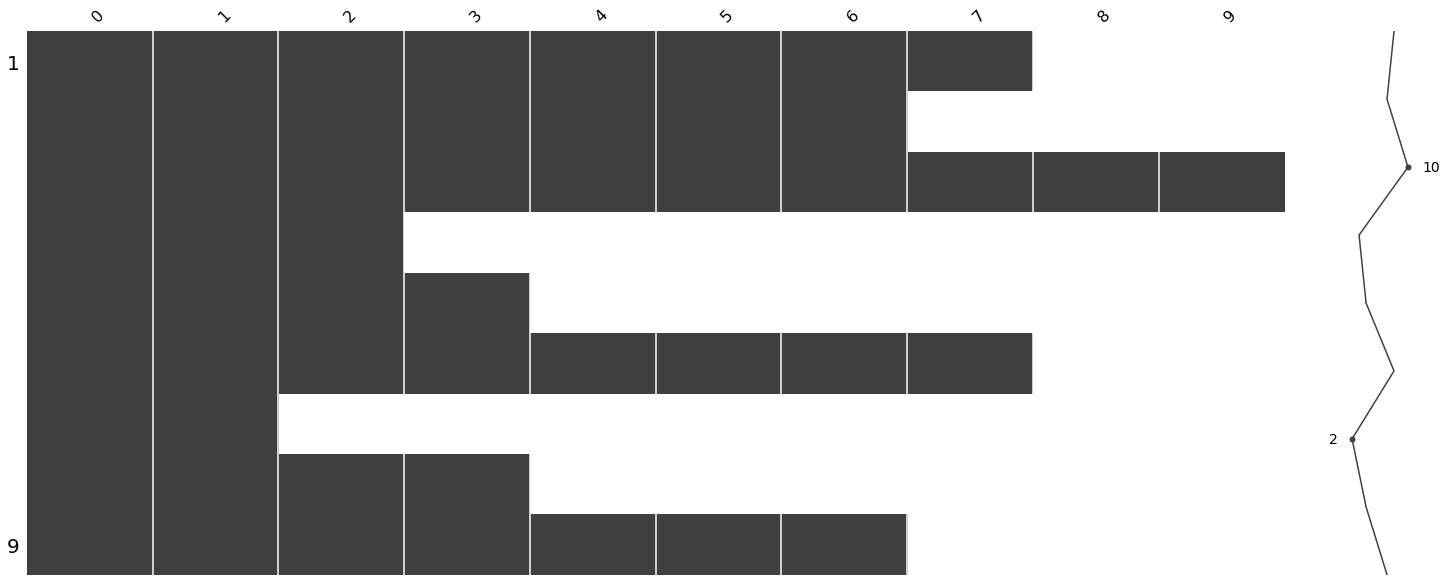

In [17]:
msno.matrix(df)

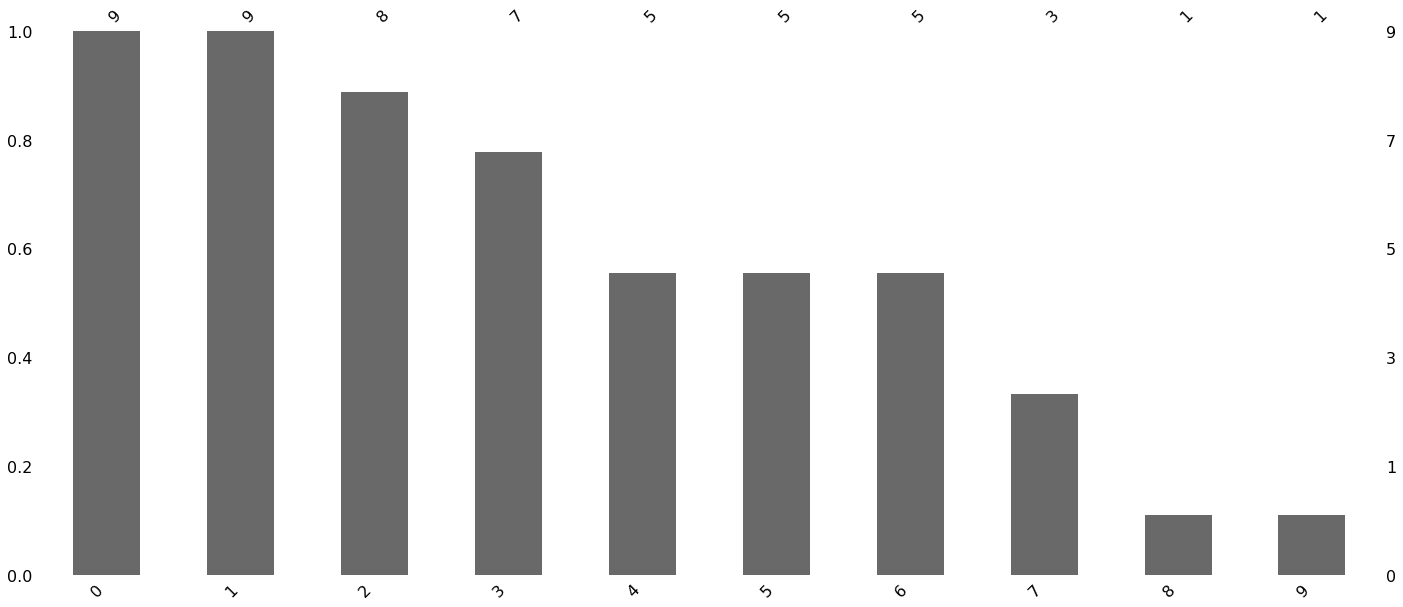

In [19]:
msno.bar(df)

In [21]:
items =["Lilo y Stitch", "Mulan", "Avengers", "Rapidos y Furiosos", "Una esposa de mentira", "Spiderman", 
         "Buscando a nemo", "Lluvia de hamburguesas", "Harry Potter", "Triple Frontera"]
items

['Lilo y Stitch',
 'Mulan',
 'Avengers',
 'Rapidos y Furiosos',
 'Una esposa de mentira',
 'Spiderman',
 'Buscando a nemo',
 'Lluvia de hamburguesas',
 'Harry Potter',
 'Triple Frontera']

In [22]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [23]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,Buscando a nemo,Harry Potter,Una esposa de mentira,Lluvia de hamburguesas,Spiderman,Triple Frontera,Avengers,Lilo y Stitch,Mulan,Rapidos y Furiosos
0,0,0,1,1,1,1,1,1,1,1
1,1,1,0,0,1,1,1,0,1,1
2,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,1,1,1,0
4,0,1,0,1,0,1,0,1,0,0


In [24]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

Processing 24 combinations | Sampling itemset size 8


,support,itemsets
0,0.444444,(Buscando a nemo)
1,0.666667,(Harry Potter)
2,0.333333,(Una esposa de mentira)
3,0.444444,(Lluvia de hamburguesas)
4,0.444444,(Spiderman)


In [25]:
freq_items.itemsets.unique()

array([frozenset({'Buscando a nemo'}), frozenset({'Harry Potter'}),
       frozenset({'Una esposa de mentira'}),
       frozenset({'Lluvia de hamburguesas'}), frozenset({'Spiderman'}),
       frozenset({'Triple Frontera'}), frozenset({'Avengers'}),
       frozenset({'Lilo y Stitch'}), frozenset({'Mulan'}),
       frozenset({'Rapidos y Furiosos'}),
       frozenset({'Buscando a nemo', 'Harry Potter'}),
       frozenset({'Buscando a nemo', 'Una esposa de mentira'}),
       frozenset({'Buscando a nemo', 'Lluvia de hamburguesas'}),
       frozenset({'Spiderman', 'Buscando a nemo'}),
       frozenset({'Buscando a nemo', 'Triple Frontera'}),
       frozenset({'Buscando a nemo', 'Avengers'}),
       frozenset({'Buscando a nemo', 'Lilo y Stitch'}),
       frozenset({'Buscando a nemo', 'Mulan'}),
       frozenset({'Buscando a nemo', 'Rapidos y Furiosos'}),
       frozenset({'Harry Potter', 'Una esposa de mentira'}),
       frozenset({'Harry Potter', 'Lluvia de hamburguesas'}),
       frozenset(

In [26]:
rules = association_rules(freq_items, min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Buscando a nemo),(Harry Potter),0.444444,0.666667,0.444444,1.000000,1.5000,0.148148,inf
1,(Harry Potter),(Buscando a nemo),0.666667,0.444444,0.444444,0.666667,1.5000,0.148148,1.666667
2,(Una esposa de mentira),(Buscando a nemo),0.333333,0.444444,0.222222,0.666667,1.5000,0.074074,1.666667
3,(Spiderman),(Buscando a nemo),0.444444,0.444444,0.333333,0.750000,1.6875,0.135802,2.222222
4,(Buscando a nemo),(Spiderman),0.444444,0.444444,0.333333,0.750000,1.6875,0.135802,2.222222
...,...,...,...,...,...,...,...,...,...
9864,"(Rapidos y Furiosos, Lluvia de hamburguesas)","(Una esposa de mentira, Spiderman, Triple Fron...",0.333333,0.222222,0.222222,0.666667,3.0000,0.148148,2.333333
9865,"(Spiderman, Triple Frontera)","(Una esposa de mentira, Lluvia de hamburguesas...",0.333333,0.222222,0.222222,0.666667,3.0000,0.148148,2.333333
9866,"(Spiderman, Lilo y Stitch)","(Una esposa de mentira, Lluvia de hamburguesas...",0.333333,0.222222,0.222222,0.666667,3.0000,0.148148,2.333333
9867,"(Triple Frontera, Rapidos y Furiosos)","(Una esposa de mentira, Lluvia de hamburguesas...",0.333333,0.222222,0.222222,0.666667,3.0000,0.148148,2.333333
